# Preview Data
Ce notebook a pour objectif de pré-visualiser les données des utilisateurs sous différents « angles » afin de mieux les comprendre ou de faire ressortir des facteurs de compréhension de la problématique.

Par la même occasion, nous étudierons les différentes corrélations entre les attributs.

In [1]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import clear_output, display

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client["Tweet"]
user_collection = db["users"]

In [4]:
users = list(user_collection.find({}))
users = pd.DataFrame(users)
users = users.drop(columns=["_id","user_id","last_tweet_published_id","tweet_ids","friends_count","followers_count"])

## Distribution des variables

In [5]:
users.describe()

,hashtag_frequency,verified,statuses_count,favourites_count,age_account,ratio_friends_followers,avg_tweet_length,tweet_frequency,nb_sensitive_tweets,Ap,visibility,ratio_sensitive_tweets,ratio_punctuation_tweets,avg_tweet_levenshtein_similarity
count,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06
mean,1.488076e+00,9.807756e-03,1.767641e+04,8.753628e+03,1.735728e+03,2.728583e+00,1.079493e+02,1.183199e+01,2.524792e-02,1.411946e-03,1.539910e-01,9.341535e-03,7.120023e-02,3.159548e+01
std,1.415785e+00,9.854729e-02,4.048342e+04,2.203470e+04,1.038434e+03,7.360785e+00,3.147568e+01,2.930424e+01,5.516997e-01,3.492319e-03,9.819461e-02,9.089836e-02,3.493993e-02,4.628203e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.711806e-02,-1.000000e+00,9.000000e+00,2.687459e-04,0.000000e+00,6.398712e-08,0.000000e+00,0.000000e+00,7.142857e-03,0.000000e+00
25%,5.000000e-01,0.000000e+00,1.105000e+03,4.430000e+02,8.164984e+02,6.929134e-01,8.800000e+01,1.130585e+00,0.000000e+00,1.363402e-04,7.558016e-02,0.000000e+00,4.664817e-02,0.000000e+00
50%,1.000000e+00,0.000000e+00,5.204000e+03,2.164000e+03,1.843173e+03,1.195531e+00,1.130000e+02,3.873848e+00,0.000000e+00,4.639399e-04,1.329816e-01,0.000000e+00,6.521739e-02,0.000000e+00
75%,2.000000e+00,0.000000e+00,1.788500e+04,7.922000e+03,2.582968e+03,2.639344e+00,1.395000e+02,1.155702e+01,0.000000e+00,1.379760e-03,1.903830e-01,0.000000e+00,9.090909e-02,8.200000e+01
max,2.500000e+01,1.000000e+00,8.901886e+06,1.718515e+06,1.769979e+04,1.695000e+03,4.160000e+02,2.742132e+03,2.010000e+02,3.264443e-01,1.510615e+00,1.000000e+00,8.285714e-01,2.973333e+02


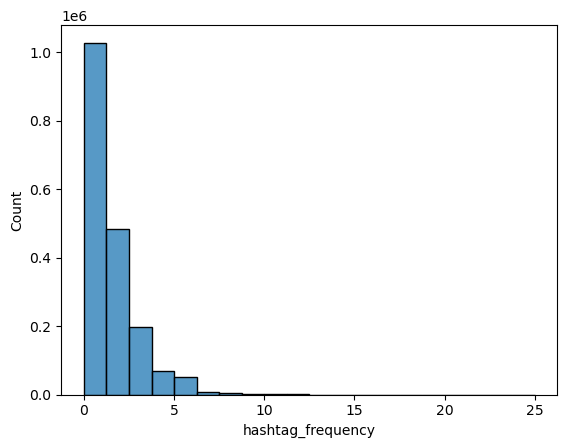

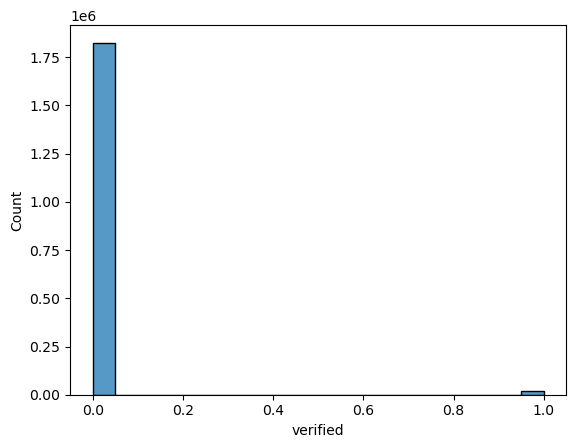

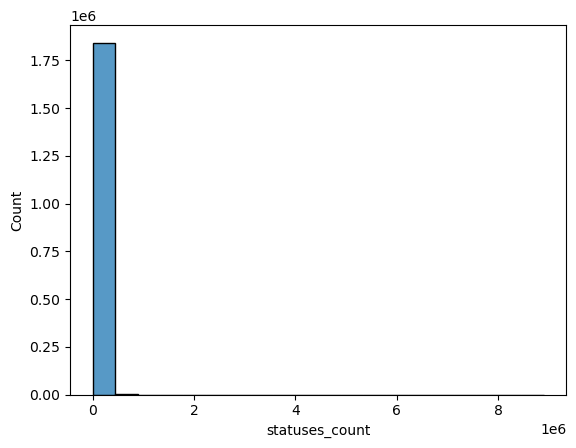

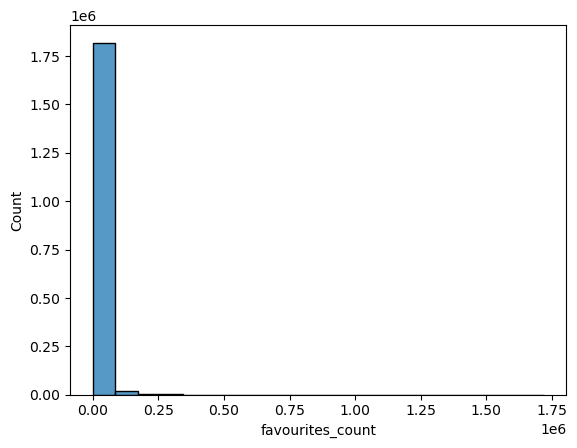

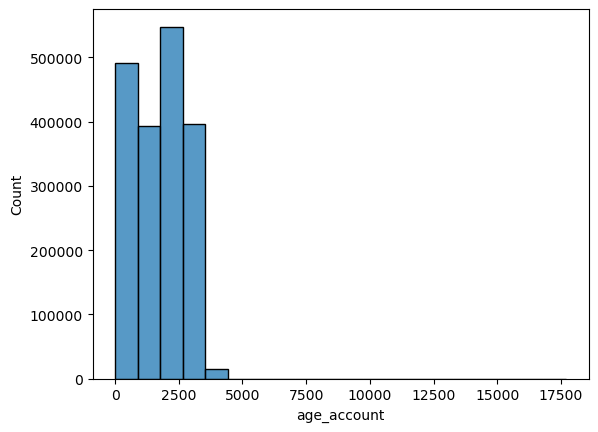

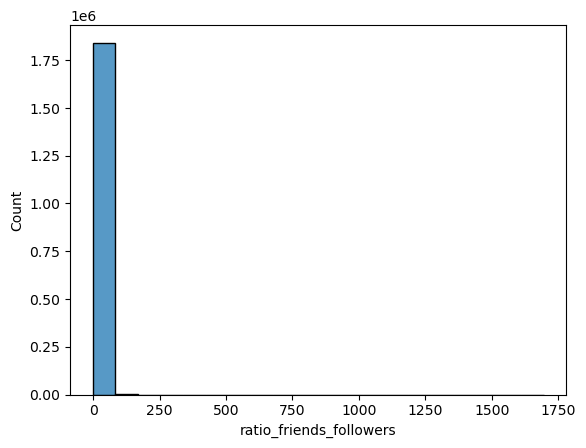

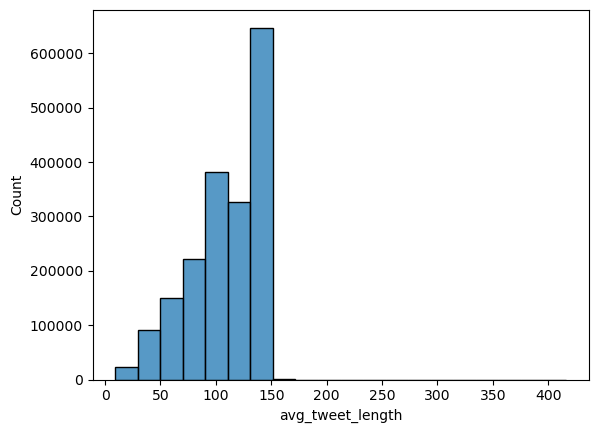

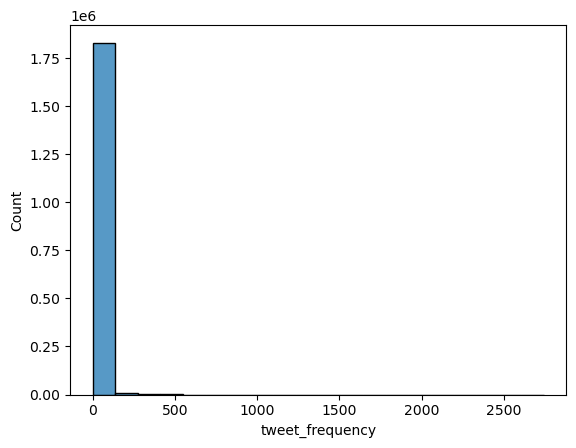

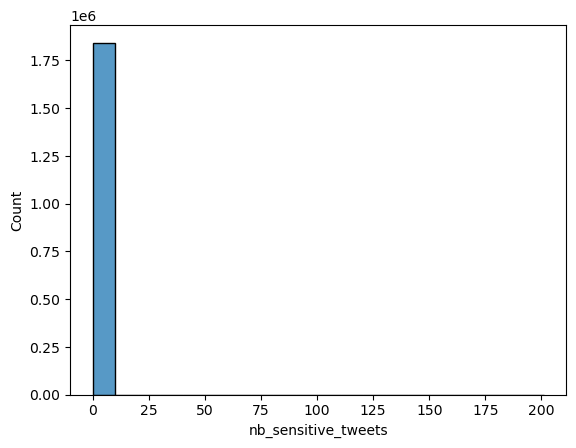

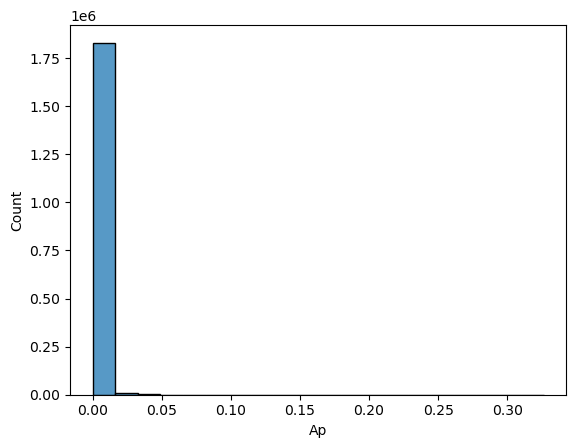

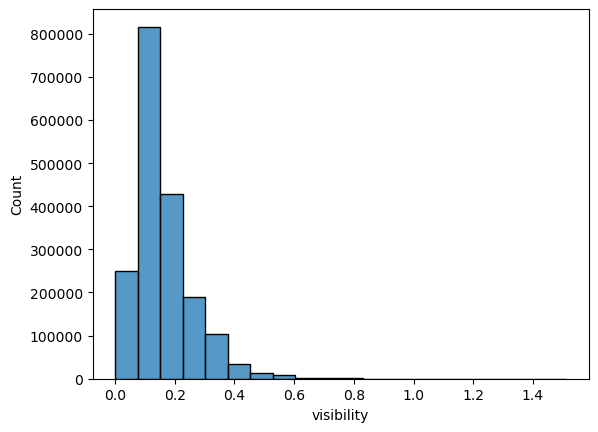

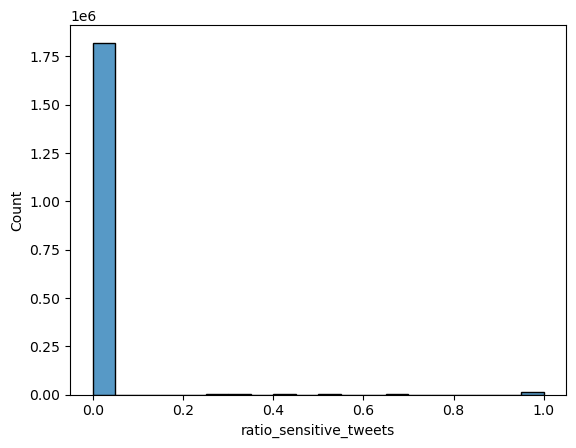

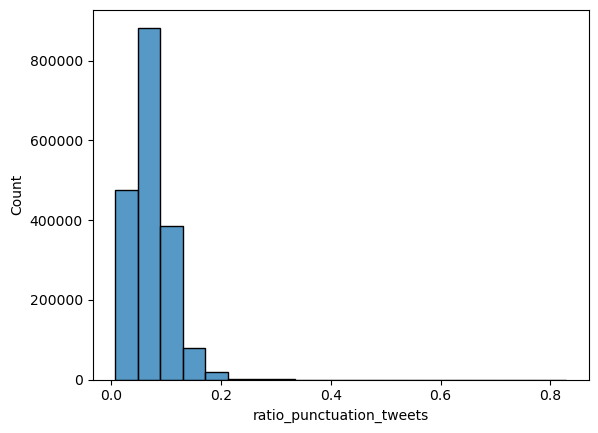

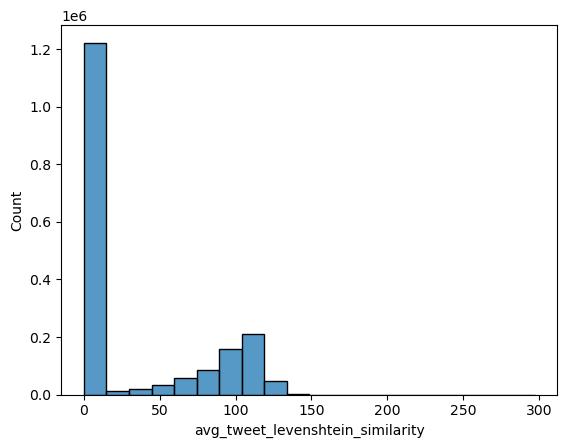

In [6]:
for col in users.columns:
    sns.histplot(users[col], bins=20)
    plt.show()

In [7]:
def print_occurences(new_value):
    attribute = new_value['new']
    clear_output()
    display(dropdown)
    print('>>>>>>>>>> COLUMN : ', attribute, ' <<<<<<<<<<')
    print('Cela peut prendre du temps en fonction des attributs.')
    counts = users[attribute].value_counts()
    counts_df = pd.DataFrame({'Valeur': counts.index, 'Occurrences': counts.values})
    print(counts_df.sort_values('Occurrences', ascending=False).to_string(index=False))

In [8]:
dropdown = widgets.Dropdown(options=users.columns)
dropdown.observe(print_occurences, names='value')
dropdown

Dropdown(options=('hashtag_frequency', 'verified', 'statuses_count', 'favourites_count', 'age_account', 'ratio…

## Autocorrélation des attributs
Analyse de la correlation entre les variables

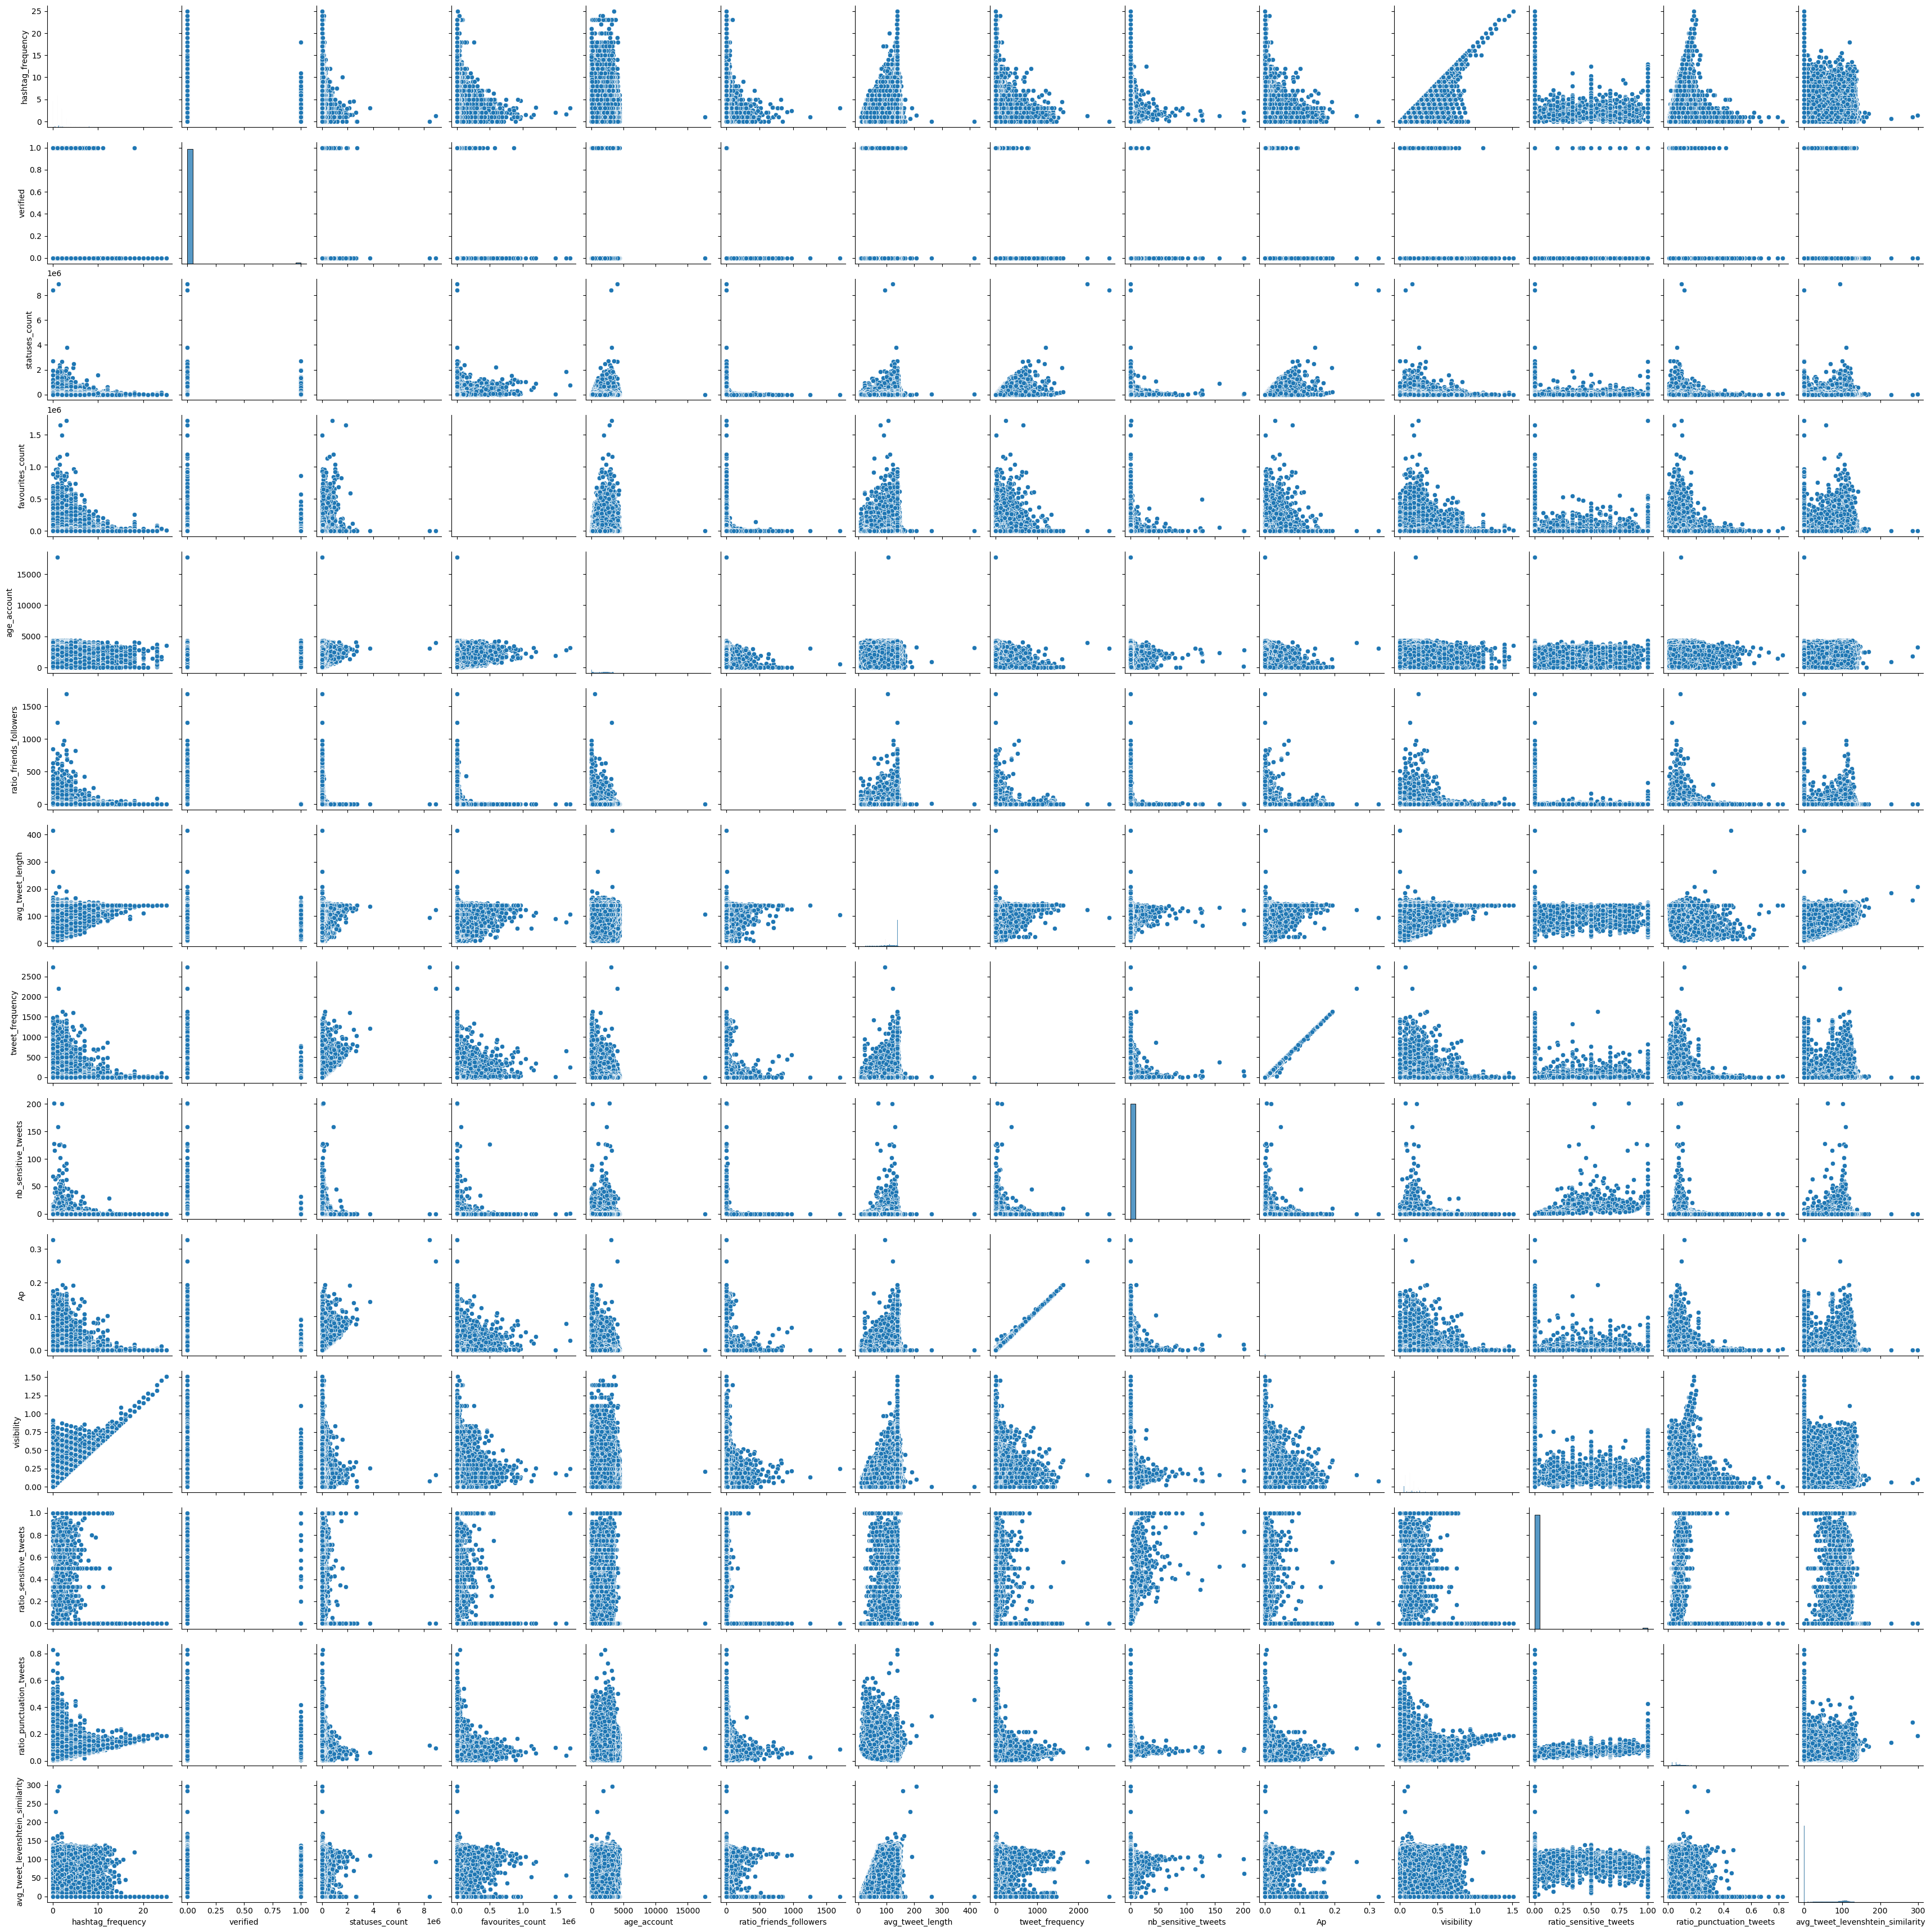

In [9]:
sns.pairplot(users)

On constate une corrélation évidente entre tweet_frequency et l'agressivité. Ceci peut s'expliquer par le fait que l'aggrésivité est calculé à l'aide de tweet_frequency. Pour l'analyse comportementale des utilisateurs, il est donc inutile d'utiliser tweet_frequency.

In [10]:
users.corr()

,hashtag_frequency,verified,statuses_count,favourites_count,age_account,ratio_friends_followers,avg_tweet_length,tweet_frequency,nb_sensitive_tweets,Ap,visibility,ratio_sensitive_tweets,ratio_punctuation_tweets,avg_tweet_levenshtein_similarity
hashtag_frequency,1.000000,-0.002598,-0.022990,-0.038577,-0.064859,0.049235,0.201824,0.002527,0.004415,0.002987,0.850328,0.000084,0.168990,0.062230
verified,-0.002598,1.000000,0.059331,-0.003914,0.098963,-0.034496,0.023322,0.009513,-0.002968,0.009420,-0.015254,-0.007870,-0.003660,0.025712
statuses_count,-0.022990,0.059331,1.000000,0.372368,0.218377,-0.096384,0.004657,0.637638,0.037811,0.636596,-0.002840,0.034700,0.003755,0.113826
favourites_count,-0.038577,-0.003914,0.372368,1.000000,0.054701,-0.071212,-0.003611,0.314533,0.016336,0.313876,-0.006391,0.016564,-0.005446,0.059498
age_account,-0.064859,0.098963,0.218377,0.054701,1.000000,-0.167740,-0.071292,-0.094007,0.002940,-0.095421,-0.096843,0.002687,-0.000235,0.014017
ratio_friends_followers,0.049235,-0.034496,-0.096384,-0.071212,-0.167740,1.000000,0.048496,-0.038755,-0.004037,-0.038019,0.056223,-0.005314,-0.011336,-0.016440
avg_tweet_length,0.201824,0.023322,0.004657,-0.003611,-0.071292,0.048496,1.000000,0.041081,-0.005274,0.041222,0.374126,-0.033106,-0.518350,0.094166
tweet_frequency,0.002527,0.009513,0.637638,0.314533,-0.094007,-0.038755,0.041081,1.000000,0.033334,0.999838,0.031251,0.027946,-0.012241,0.110250
nb_sensitive_tweets,0.004415,-0.002968,0.037811,0.016336,0.002940,-0.004037,-0.005274,0.033334,1.000000,0.033491,0.003664,0.353654,0.016926,0.037877
Ap,0.002987,0.009420,0.636596,0.313876,-0.095421,-0.038019,0.041222,0.999838,0.033491,1.000000,0.031608,0.027899,-0.012182,0.110650
